In [1]:
# try to run the code on google colab...
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
#   root = "C:/Users/DiogoMelo/nutreconDrive/"
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import sys
import pandas as pd
from glob import glob
import plotly.express as px
from random import randrange

sys.path.append(root + 'python')
from variableCoding import Vars
import importData as load_data
_v_ = Vars()

csv_paths = glob('D:/FV/Projects/NUTRECON/Results/Subject Level/parameter estimates/*.csv')
print('{} files.\nExample path: {}'.format(len(csv_paths), csv_paths[randrange(len(csv_paths))]))

par_dic = {0:'money alpha',
           6:'money alpha',
           12:'money alpha',
           1:'CS+ alpha',
           7:'CS+ alpha',
           13:'CS+ alpha',
           2:'CS- alpha',
           8:'CS- alpha',
           14:'CS- alpha',
           3: 'beta',
           9: 'beta',
           15: 'beta',
           4: 'CS+ sFactor',
           10: 'CS+ sFactor',
           16: 'CS+ sFactor',
           5: 'CS- sFactor',
           11: 'CS- sFactor',
           17: 'CS- sFactor',}

Running Code locally
Running Code locally
20 files.
Example path: D:/FV/Projects/NUTRECON/Results/Subject Level/parameter estimates\nutre018_parameterEstimates.csv


In [2]:
data_folder = _v_.responses_dataPath.split('Data')[0] + 'Data/'

psychometrics_path = "{}NUTRECON_psychometrics.xlsx".format(data_folder)

psychometrics_dict = pd.read_excel(psychometrics_path, sheet_name=None, index_col=0)
print(list(psychometrics_dict.keys()))

sociodemo_df = load_data.sociodemographic(psychometrics_dict)

group_exclusion_df = sociodemo_df[['sub_id', 'cohort_id', 'excluded']]

problem_participants = ['nutre001', 'nutre002', 'nutre004', 'nutre005',
                'nutre012','nutre014', 'nutre015', 'nutre017']
import numpy as np
group_exclusion_df['problematic participants'] = np.where(group_exclusion_df['sub_id'].isin(problem_participants), 
                                                          1,0)
first = True
for path in csv_paths:
    subject_id = path.split('_parameterEstimates')[0].split('\\')[-1]
    sub_df = pd.read_csv(path)
    sub_df['sub_id'] = subject_id
    if first:
        pars_df = sub_df
        first = False
    else:
        pars_df = pd.concat([pars_df, sub_df])


pars_df['parameter'] = pars_df.reset_index()['index'].replace(par_dic)
pars_df[['estimate mean','_','estimate CI']] = pars_df['mean and CI'].str.split(' ', expand = True)
pars_df.drop(columns=['mean and CI', '_'], inplace=True)
pars_df['estimate mean'] = pars_df['estimate mean'].astype(float)
pars_df = pars_df.merge(group_exclusion_df, on='sub_id')
pars_df['comment'] = pars_df['comment'].fillna('')
pars_df = pars_df[pars_df['excluded'] == 0]

problem_or_comment_mask = (pars_df['problematic participants'] != 0) | (pars_df['comment'] != '')
pars_df['problem or comment'] = np.where(problem_or_comment_mask, 1,0)
pars_df

['sociodemografic', 'PFS', 'YFAS', 'DEBQ', 'QAA', 'BDI', 'BAI', 'PANAS', 'Taste-strips', 'Conditioning']


C:\Users\Admin\AppData\Local\Temp\ipykernel_4572\3159417550.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_exclusion_df['problematic participants'] = np.where(group_exclusion_df['sub_id'].isin(problem_participants),


,init guess,Day,comment,sub_id,parameter,estimate mean,estimate CI,cohort_id,excluded,problematic participants,problem or comment
0,0.0,2,Both alphas are negative but only CS- should be,nutre001,money alpha,0.475,0.086,cohort 1,0,1,1
1,0.0,2,Both alphas are negative but only CS- should be,nutre001,CS+ alpha,0.374,0.065,cohort 1,0,1,1
2,0.0,2,Both alphas are negative but only CS- should be,nutre001,CS- alpha,-0.704,0.483,cohort 1,0,1,1
3,2.0,2,Both alphas are negative but only CS- should be,nutre001,beta,2.006,0.536,cohort 1,0,1,1
4,1.0,2,Both alphas are negative but only CS- should be,nutre001,CS+ sFactor,0.516,0.111,cohort 1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
307,0.2,3,,nutre020,CS+ alpha,0.377,0.049,cohort 2,0,0,0
308,0.2,3,,nutre020,CS- alpha,0.391,0.053,cohort 2,0,0,0
309,10.0,3,,nutre020,beta,2.366,0.479,cohort 2,0,0,0
310,1.0,3,,nutre020,CS+ sFactor,0.231,0.056,cohort 2,0,0,0


In [3]:
import plotly.graph_objects as go

problem_or_comment_df = pars_df[problem_or_comment_mask][
    ['cohort_id','sub_id', 'Day','problematic participants', 'comment']
    ].drop_duplicates().set_index(['cohort_id','sub_id', 'Day'])

problem_or_comment_df.to_excel('D:/FV/Projects/NUTRECON/Results/Subject Level/parameter estimates/problem or comment.xlsx')

df_table = problem_or_comment_df.reset_index()
# df_table.loc[df_table['cohort_id'].duplicated(), 'cohort_id'] = ''
# df_table.loc[df_table['sub_id'].duplicated(), 'sub_id'] = ''
# df_table.loc[df_table['Day'].duplicated(), 'Day'] = ''

table = go.Table(
    header=dict(values=df_table.columns.tolist()),
    cells=dict(values=df_table.T.values)
    )

fig = go.Figure(data=table).update_layout()
fig.show()

In [10]:
d2_mask = (pars_df['Day'] == 2)

d2_dfwide = pars_df[d2_mask].drop(
    columns=['estimate CI', 'Day', 'init guess', 'comment', 'excluded', 'problematic participants']).pivot(
        index= ['sub_id',  'cohort_id', 'problem or comment'], columns=['parameter'], 
        values = ['estimate mean']).droplevel(0, axis='columns').reset_index()

def _compareYogurts(row):
    cPlus_eu = (.2**row['money alpha']) / row['CS+ sFactor']
    cMinus_eu = (.2**row['money alpha']) / row['CS- sFactor']
    if cPlus_eu> cMinus_eu:
        out = 'CS+'
    else:
        out= 'CS-'
    return out




d2_dfwide['baseline preference'] = d2_dfwide.apply(lambda row: _compareYogurts(row), axis = 1)

subject_preference = d2_dfwide[['sub_id','baseline preference']]
pars_df = pars_df.merge(subject_preference, on='sub_id')

d2_dfwide[['cohort_id', 'baseline preference']].groupby('cohort_id').value_counts()




cohort_id  baseline preference
cohort 1   CS+                    5
           CS-                    2
cohort 2   CS+                    7
           CS-                    2
dtype: int64

In [11]:
d2_dfwide[d2_dfwide['problem or comment']==0][['cohort_id', 'baseline preference']].groupby('cohort_id').value_counts()

cohort_id  baseline preference
cohort 1   CS+                    3
           CS-                    1
cohort 2   CS+                    5
           CS-                    2
dtype: int64

In [5]:
df_ = pars_df[pars_df['Day']!=1]
for cohort in sorted(list(df_['cohort_id'].unique())):
      df = df_[df_['cohort_id'] == cohort]
    

      fig = px.line(df, facet_col = 'parameter', facet_col_wrap=2,
                  x = 'Day', y = 'estimate mean', color = 'sub_id',
                  markers=True, #symbol='comment',
                  line_dash='problem or comment',
                  color_discrete_sequence = px.colors.qualitative.Alphabet,
                  category_orders=
                        {'Day':[1,2,3],
                        "sub_id": sorted(list(pars_df['sub_id'].unique())),
                        "parameter": ['money alpha', 'beta', 'CS+ alpha',
                                    'CS- alpha', 'CS+ sFactor', 'CS- sFactor'],
                        "problem or comment": [0,1]},
                  title = '{}'.format(cohort))
      
      fig.update_yaxes(matches=None, showticklabels=True)
      fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

      fig.show()


# BY BASELINE PREFERENCE

## ALL SUBS

### BY Cohort

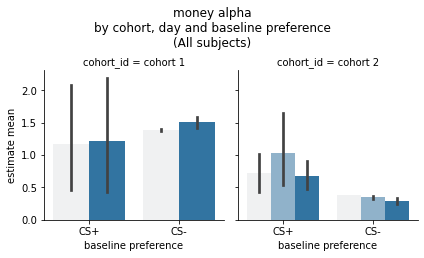

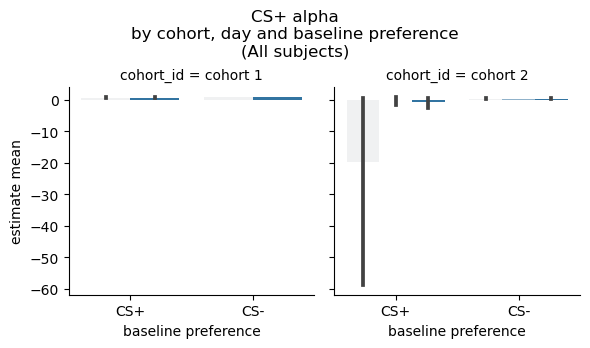

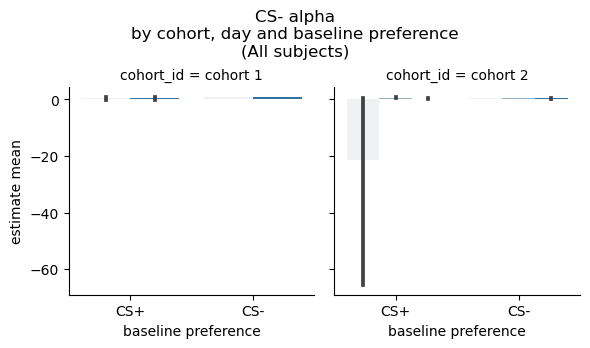

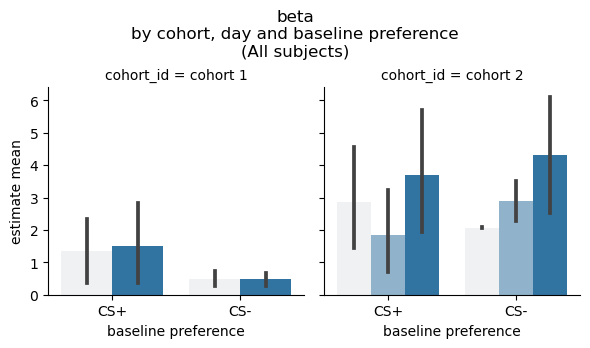

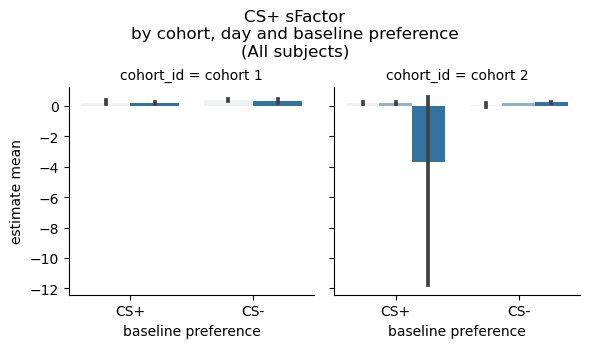

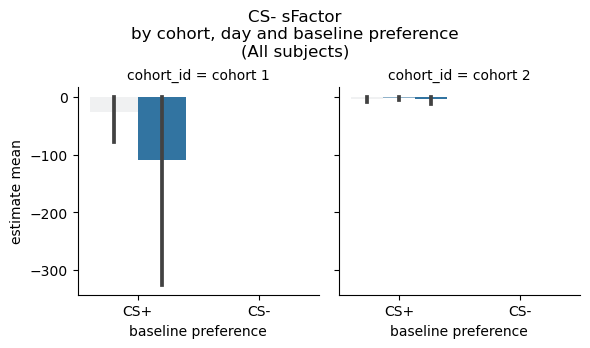

In [6]:
import seaborn as sns

tmp_df = pars_df.copy()
for parameter in tmp_df['parameter'].unique():
    df = tmp_df[tmp_df['parameter'] == parameter]
    g = sns.FacetGrid(df, col = 'cohort_id',  margin_titles=True)
    g.map_dataframe(sns.barplot, x = 'baseline preference', y = 'estimate mean', hue = 'Day')
    g.fig.suptitle('{}\nby cohort, day and baseline preference\n(All subjects)'.format(parameter), va = 'bottom')

### Both cohorts together

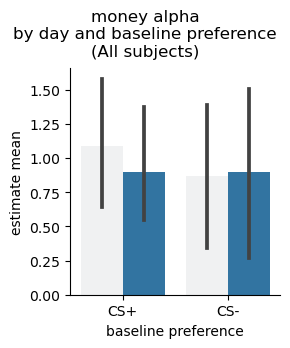

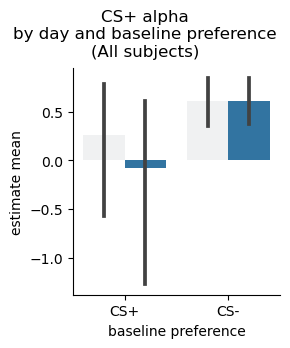

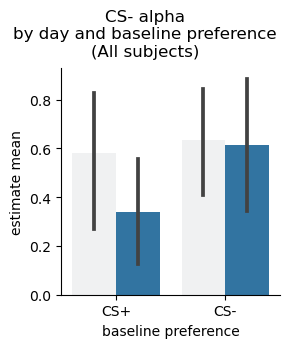

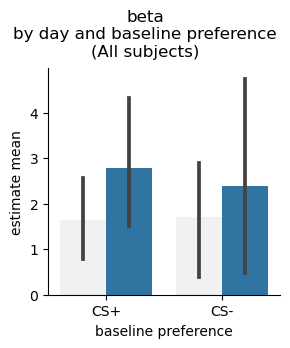

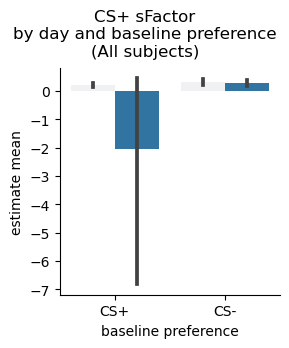

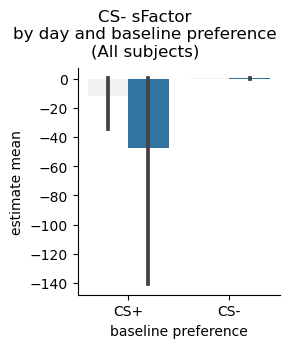

In [7]:
import seaborn as sns

tmp_df = pars_df[pars_df['Day'] != 1].copy()
for parameter in tmp_df['parameter'].unique():
    df = tmp_df[tmp_df['parameter'] == parameter]
    g = sns.FacetGrid(df,  margin_titles=True)
    g.map_dataframe(sns.barplot, x = 'baseline preference', y = 'estimate mean', hue = 'Day')
    g.fig.suptitle('{}\nby day and baseline preference\n(All subjects)'.format(parameter), va = 'bottom')

## Subjects without estimation issues

### By Cohort

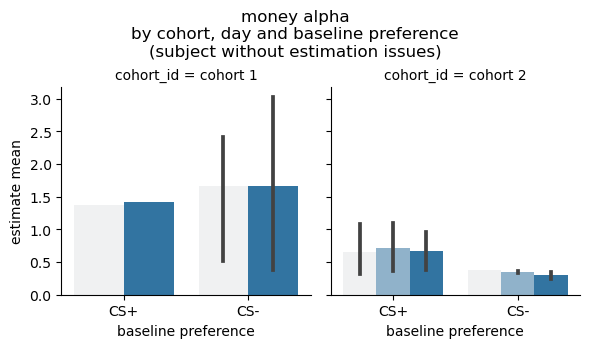

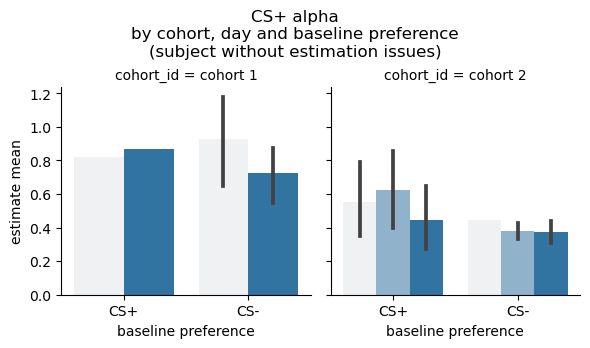

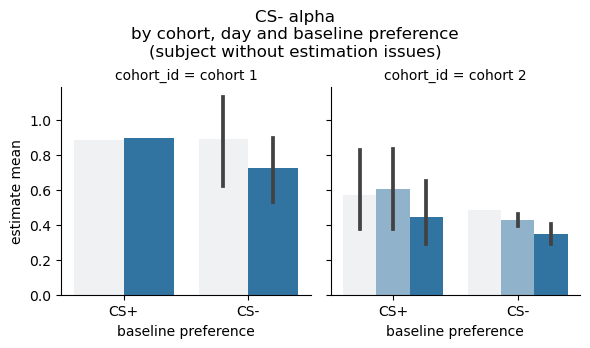

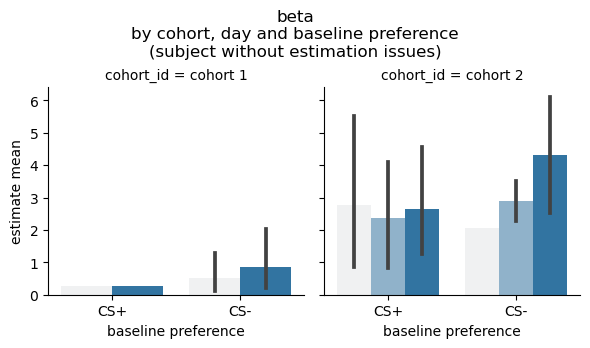

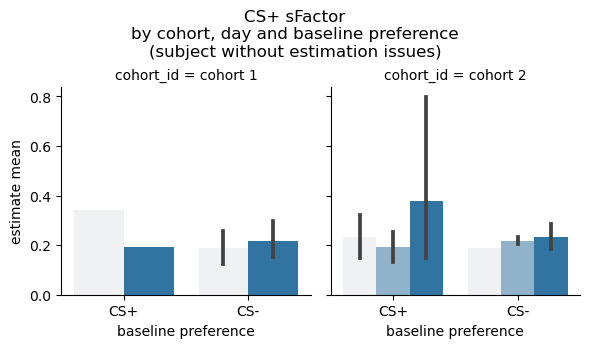

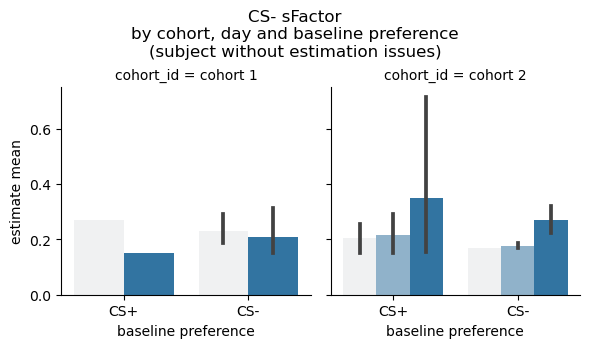

In [8]:
import seaborn as sns

tmp_df = pars_df[pars_df['problem or comment'] == 0].copy()
for parameter in tmp_df['parameter'].unique():
    df = tmp_df[tmp_df['parameter'] == parameter]
    g = sns.FacetGrid(df, col = 'cohort_id',  margin_titles=True)
    g.map_dataframe(sns.barplot, x = 'baseline preference', y = 'estimate mean', hue = 'Day')
    g.fig.suptitle('{}\nby cohort, day and baseline preference\n(subject without estimation issues)'.format(parameter), va = 'bottom')

### Both Cohorts together

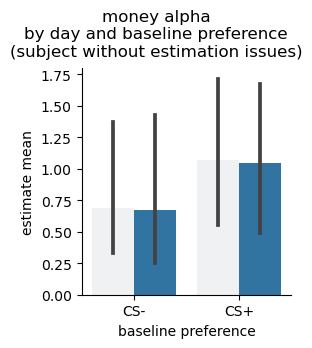

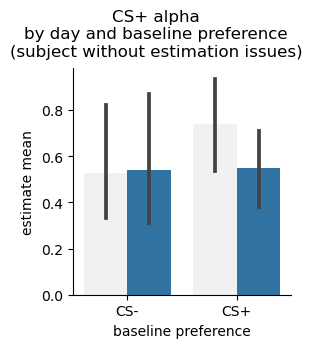

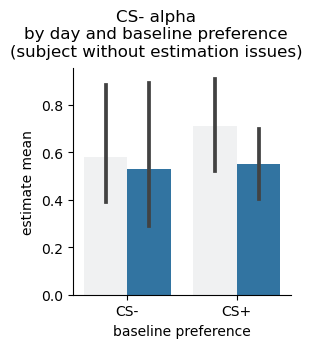

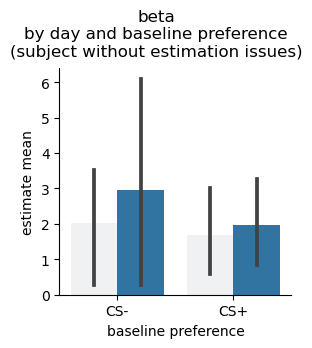

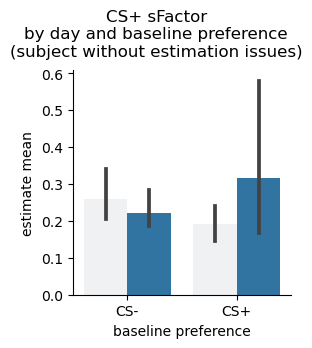

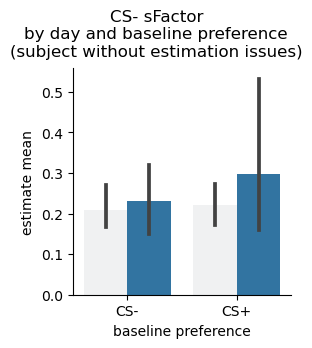

In [9]:
import seaborn as sns

tmp_df = pars_df[(pars_df['Day'] != 1) & (pars_df['problem or comment'] == 0)].copy()
for parameter in tmp_df['parameter'].unique():
    df = tmp_df[tmp_df['parameter'] == parameter]
    g = sns.FacetGrid(df,  margin_titles=True)
    g.map_dataframe(sns.barplot, x = 'baseline preference', y = 'estimate mean', hue = 'Day')
    g.fig.suptitle('{}\nby day and baseline preference\n(subject without estimation issues)'.format(parameter), va = 'bottom')